In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1v0PiRlSXYTrNrHQcuHEQ41drvAptp_ug')

# Using data to shop the best lingerie

In this notebook I will be doing an exploratory analysis on  June 2017-July 2017 lingerie data from popular retailers such as: Amazon, American Eagle, b.tempt'd, Calvin Klein, Hanky Panky , Macy's, Nordstrom and Topshop USA.


The focus on this notebook will be:
- Analysis on the general quality of the brand measured by the ratings of their products.
- Analysis of quality, price and discounts in other to find the lingerie with a good relationship quality price.
- Analysis of the difference in price depending on the brand and retailer.
- Finding common style attributes.
- Analysis of the sizes available





__NOTE:__ This project was done as part of the [Jovian.ml](https://jovian.ml) Zero to Pandas [course](http://zerotopandas.com). This notebook was intended to be run on a colab instance and use a Kaggle API key to access the data.



In [3]:
project_name = "zerotopandas-course-project" # change this

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/mvortizr/zerotopandas-course-project


'https://jovian.ml/mvortizr/zerotopandas-course-project'

### Getting the data


In [7]:
# Colab library to upload files to notebook
from google.colab import files

In [8]:
# Install Kaggle library
!pip install -q kaggle

__Connecting with Kaggle__


In [9]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [10]:
!touch ~/.kaggle/kaggle.json

Note: If the previous cell fails run the kaggle datasets one (it will fail too) and then re-run this again.

In [11]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [12]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
#Download datasets from Kaggle 
!kaggle datasets download -d PromptCloudHQ/innerwear-data-from-victorias-secret-and-others

innerwear-data-from-victorias-secret-and-others.zip: Skipping, found more recently modified local copy (use --force to force download)


__Loading the data__

In [14]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [15]:
!unzip innerwear-data-from-victorias-secret-and-others.zip -d datasets

Archive:  innerwear-data-from-victorias-secret-and-others.zip
replace datasets/ae_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/amazon_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/btemptd_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/calvinklein_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/hankypanky_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/macys_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/shop_nordstrom_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/us_topshop_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/victoriassecret_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## __Data Preparation and Cleaning__


In [16]:
import pandas as pd

### __Creating the initial dataframes__

I will load all the `.csv` files on different dataframes, each dataframe belongs to a different retailer.


In [17]:
american_eagle_df = pd.read_csv('./datasets/ae_com.csv')
amazon_df = pd.read_csv('./datasets/amazon_com.csv')
btemptd_df = pd.read_csv('./datasets/btemptd_com.csv')
calvin_klein_df = pd.read_csv('./datasets/calvinklein_com.csv')
hanky_panky_df = pd.read_csv('./datasets/hankypanky_com.csv')
macys_df = pd.read_csv('./datasets/macys_com.csv')
nordstrom_df = pd.read_csv('./datasets/shop_nordstrom_com.csv')
topshop_df = pd.read_csv('./datasets/us_topshop_com.csv')
victorias_secret_df = pd.read_csv('./datasets/victoriassecret_com.csv')


### __Exploring the dataframes__

All the dataframes have the same columns:
- `product_name`: name of the product
- `mrp`: maximun retail price
- `price`: price of the product
- `pdp_url`: url of the product
- `brand_name`: name of the brand
- `product_category`: category of the product
- `retailer`: retailer of the product
- `description`: description of the product
- `rating`: rating of the product
- `review count`: number of reviews the product received
- `style_attributes`: styles attributes of the product
- `total_sizes`: total sizes of the product
- `available_sizes`: available sizes of the product
- `color`: colors available of the product

In [18]:
american_eagle_df.columns

Index(['product_name', 'mrp', 'price', 'pdp_url', 'brand_name',
       'product_category', 'retailer', 'description', 'rating', 'review_count',
       'style_attributes', 'total_sizes', 'available_size', 'color'],
      dtype='object')

### __Cleaning the brand names__

If we see the unique values of the column `brand_name` of each retailer, we can notice several inconsistencies:

1. Existence of links instead of strings in the amazon dataframe

2. Each retailer typed the name of the brands differently. For example, Macy's wrote `Wacoal` but nordstrom wrote `WACOAL` or `B.TEMPT'D BY WACOAL`. 

We want to keep the name of every brand consistent across the different dataframes.

We will keep the dataframes from American Eagle, Victoria's Secret and Calvin Klein as they are.

In [19]:
american_eagle_df.brand_name.unique(), calvin_klein_df.brand_name.unique(),victorias_secret_df.brand_name.unique()

(array(['AERIE', 'AEO'], dtype=object),
 array(['Calvin Klein'], dtype=object),
 array(["Victoria's Secret", "Victoria's Secret Pink"], dtype=object))

__Cleaning the amazon dataframe brand names__

In [20]:
amazon_df.brand_name.unique()

array(['Calvin-Klein', 'Wacoal', 'Hanky-Panky', 'b-temptd',
       'Victorias-Secret', 's',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila', 'Lucky-Brand',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal',
       'Creative-Motion', 'Sexy-Hair', 'Nintendo', 'Compression-Comfort'],
      dtype=object)

Some brands listed look like wrong data. For instance, it seems suspicious that Nintendo is listed as a brand, I don't think Nintendo does Lingerie... let's inspect that.

In [21]:
amazon_df[amazon_df.brand_name == 'Nintendo']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
29424,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,$38.00,$30.40,https://www.amazon.com/-/dp/B015O76DM2?th=1&psc=1,Nintendo,Bras,Amazon US,Balconette features corded lace overlay with a...,4.3,375,"[ 86% Nylon/14% Spandex , Imported , Hook and ...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...",Peacoat


In fact, it appears to be a btempt wacoal product that was listed as "Nintendo", it is better to drop this product

In [22]:
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Nintendo'].index, inplace=True)

Now, let's watch other suspicious brands such as 'Creative-Motion', 'Sexy-Hair', 's','Lucky-Brand' and 'Compression-Comfort'

In [23]:
amazon_df[amazon_df.brand_name == 'Creative-Motion']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
21008,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,$38.00,$21.89,https://www.amazon.com/-/dp/B00V9RV5M0?th=1&psc=1,Creative-Motion,Bras,Amazon US,Balconette features corded lace overlay with a...,4.3,376,"[ 86% Nylon/14% Spandex , Imported , Hand Wash...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...","30DD , 32B , 32C , 32D , 32DD , 34C , 34D , 36...",Dazzling Blue


In [24]:
amazon_df[amazon_df.brand_name == 's']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
935,Wacoal Women's Front Close T-Back Bra,$46.00,$46.00,https://www.amazon.com/-/dp/B0002NXT4Y?th=1&psc=1,s,Bras,Amazon US,Pure comfort in a seamless molded front close ...,4.2,742,"[ Fabric: 87% Nylon , 13% Spandex; Top cup: 10...","32C , 32D , 32DD , 34B , 34C , 34D , 34DD , 36...","32C , 32D , 32DD , 34B , 34C , 34D , 36B , 36C...",Black
10417,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,$38.00,$24.95,https://www.amazon.com/-/dp/B01FXTD1XK?th=1&psc=1,s,Bras,Amazon US,Balconette features corded lace overlay with a...,4.3,377,"[ 86% Nylon/14% Spandex , Imported , Hand Wash...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...",Baja Blue
28997,Wacoal Women's Embrace Lace Hi-Cut Brief Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B006M0J8Q4?th=1&psc=1,s,Panties,Amazon US,Embrace lace hi-cut brief offers great fit and...,4.5,23,"[ Body: 82% Nylon, 18% Spandex , Imported , Ha...","Small , Medium , Large , X-Large , 2X , 2X Plus","Medium , Large , X-Large , 2X",Small


In [25]:
amazon_df[amazon_df.brand_name == 'Compression-Comfort']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
29805,Wacoal Women's Ultimate Side Contour Bra,$68.00,$68.00,https://www.amazon.com/-/dp/B013V1521G?th=1&psc=1,Compression-Comfort,Bras,Amazon US,Ultimate side smoother contour t-shirt bra off...,3.7,57,"[ 58% Nylon, 42% Spandex , Imported , Hook and...","30C , 30D , 30DD , 30DDD , 30G , 32C , 32D , 3...","30C , 30D , 30DD , 30DDD , 30G , 32C , 32D , 3...",Black


In [26]:
amazon_df[amazon_df.brand_name == 'Sexy-Hair']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
26158,Wacoal Women's Full Figure Basic Beauty Underw...,$54.87,$54.87,https://www.amazon.com/-/dp/B008DKBZ9E?th=1&psc=1,Sexy-Hair,Bras,Amazon US,Seamless molded two-ply cups with inner sling ...,4.2,959,"[ 85% Nylon/15% Spandex , Imported , Hook and ...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...","32D , 32DD , 32DDD , 34C , 34D , 34DD , 34DDD ...",Cappuccino


In [27]:
amazon_df[amazon_df.brand_name == 'Lucky-Brand']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
8906,Wacoal Women's Embrace Lace Bikini Panty,$15.07,$15.07,https://www.amazon.com/-/dp/B0147GNOP0?th=1&psc=1,Lucky-Brand,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.3,94,"[ 100% Nylon , Imported , Hand Wash , Scallope...","Small , Medium , Large , X-Large","Small , X-Large",Large


It appears that all of them are Btemptd products that were mislabelled as well. Let's drop them all

In [28]:
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Creative-Motion'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 's'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Compression-Comfort'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Sexy-Hair'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Lucky-Brand'].index, inplace=True)

Now we want to standarize the name of the brands left

In [29]:
amazon_df.brand_name.unique()

array(['Calvin-Klein', 'Wacoal', 'Hanky-Panky', 'b-temptd',
       'Victorias-Secret',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal'],
      dtype=object)

In [30]:
def standarize_amazon_brand_names(brand_name):
  if brand_name in ['Calvin-Klein','ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein']:
    brand_name = 'Calvin Klein'
  elif brand_name in ['ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal','Wacoal', 'b-temptd','ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d']:
    brand_name = "b.tempt'd"
  elif brand_name == 'Hanky-Panky':
    brand_name = 'Hanky Panky'
  elif brand_name == 'Victorias-Secret':
    brand_name = "Victoria's Secret"
  return brand_name

In [31]:
amazon_df['brand_name'] = amazon_df['brand_name'].apply(standarize_amazon_brand_names)

And it's done!

In [32]:
amazon_df.brand_name.unique()

array(['Calvin Klein', "b.tempt'd", 'Hanky Panky', "Victoria's Secret",
       'Fila'], dtype=object)

__Cleaning b.tempt'd brand name__

In [33]:
btemptd_df.brand_name.unique()

array(['WACOAL'], dtype=object)

In [34]:
btemptd_df.brand_name = "b.tempt'd"

In [35]:
btemptd_df.brand_name.unique()

array(["b.tempt'd"], dtype=object)

__Cleaning the Hanky Panky brand name__

In [36]:
hanky_panky_df.brand_name.unique()

array(['HankyPanky'], dtype=object)

In [37]:
hanky_panky_df.brand_name = 'Hanky Panky'

In [38]:
hanky_panky_df.brand_name.unique()

array(['Hanky Panky'], dtype=object)

__Cleaning Macy's brand names__

In [39]:
macys_df.brand_name.unique()

array(['Calvin Klein', 'Wacoal', 'Hanky Panky', "b.tempt'd by Wacoal",
       'Calvin Klein Modern Cotton', 'Vanity Fair',
       'Calvin Klein Performance', "b.tempt'd"], dtype=object)

In [40]:
def standarize_macys_brand_names(brand_name):
  if brand_name in ['Calvin Klein','Calvin Klein Modern Cotton','Calvin Klein Performance']:
    brand_name = 'Calvin Klein'
  elif brand_name in ['Wacoal',"b.tempt'd by Wacoal"]:
    brand_name = "b.tempt'd"
  return brand_name

In [41]:
macys_df['brand_name'] = macys_df['brand_name'].apply(standarize_macys_brand_names)

In [42]:
macys_df.brand_name.unique()

array(['Calvin Klein', "b.tempt'd", 'Hanky Panky', 'Vanity Fair'],
      dtype=object)

__Clean nordstrom dataframe__

In [43]:
nordstrom_df.brand_name.unique()

array(['WACOAL', 'HANKY PANKY', "B.TEMPT'D BY WACOAL", 'CALVIN KLEIN',
       'NORDSTROM LINGERIE'], dtype=object)

In [44]:
def standarize_nordstrom_brand_names(brand_name):
  if brand_name == 'CALVIN KLEIN':
    brand_name = 'Calvin Klein'
  elif brand_name in ['WACOAL',"B.TEMPT'D BY WACOAL"]:
    brand_name = "b.tempt'd"
  elif brand_name == 'HANKY PANKY':
    brand_name = 'Hanky Panky'
  elif brand_name == 'NORDSTROM LINGERIE':
    brand_name = 'Nordstrom'
  return brand_name

In [45]:
nordstrom_df['brand_name'] = nordstrom_df['brand_name'].apply(standarize_nordstrom_brand_names)

In [46]:
nordstrom_df.brand_name.unique()

array(["b.tempt'd", 'Hanky Panky', 'Calvin Klein', 'Nordstrom'],
      dtype=object)

__Clean Top Shop brand name__

In [47]:
topshop_df.brand_name.unique()

array(['US TOPSHOP'], dtype=object)

In [48]:
topshop_df.brand_name = 'Top Shop'

In [49]:
topshop_df.brand_name.unique()

array(['Top Shop'], dtype=object)

### __Cleaning the retailers names__

The names displayed on the retailer column must be the correct spelling of the brand. We know every retailer is from the US so let's remove that information

In [50]:
american_eagle_df.retailer = 'American Eagle'
amazon_df.retailer = 'Amazon'
btemptd_df.retailer = "b.tempt'd"
calvin_klein_df.retailer = 'Calvin Klein'
hanky_panky_df.retailer = 'Hanky Panky'
macys_df.retailer = "Macy's"
nordstrom_df.retailer = 'Nordstrom'
topshop_df.retailer = 'Top Shop'
victorias_secret_df.retailer = "Victoria's Secret"

### __Merging all dataframes in one__

In [51]:
lingerie_df = american_eagle_df
lingerie_df = lingerie_df.append(amazon_df)
lingerie_df = lingerie_df.append(btemptd_df)
lingerie_df = lingerie_df.append(calvin_klein_df)
lingerie_df = lingerie_df.append(hanky_panky_df)
lingerie_df = lingerie_df.append(macys_df)
lingerie_df = lingerie_df.append(nordstrom_df)
lingerie_df = lingerie_df.append(topshop_df)
lingerie_df = lingerie_df.append(victorias_secret_df)

### __Cleaning price fields__

The price field is inconsistent between all the dataframes, I will standarize this field to be in american dollars and delete all the `$` or `USD` symbols. To do this I will use two functions:
 - `standarize_price` will convert prices from strings like `'12.30 USD'` and `'$34.56'` to numeric values like `12.30` and `34.56`
 - `standarize_prices` will get a Panda series with the `mrp` and `price` columns and it will apply the function `standarize_price` to each of them

Some price are written like a range, e.g `$12.00 USD - $24 USD` in those circumstances we will consider the mean of both prices.

In [52]:
import re

colon_to_dollar = 0.001678
rp_to_dollar = 0.25

# Standarize individual price

def standarize_price_range(price,symbol): 
  index = price.find(symbol)
  first_price = pd.to_numeric(price[:index])
  second_price = pd.to_numeric(price[index+1:])
  return (first_price + second_price)/2

def convert_to_dollars(price,symbol,conv_rate):
  price = price.replace(symbol, '').strip()
  price = pd.to_numeric(price) * conv_rate
  return price


def standarize_price(price):
  
  if type(price) is str:
    
    # Remove $ and usd symbols  
    price = price.strip().lower().replace('usd', '').replace('$','').strip() 

    #Handle other alphanumerics
    val = re.search('[a-zA-Z]+', price)
    if val!= None and val[0].isalpha():
      price = '0.0'
    
    # Handle when price is a range
    if '-' in price: 
      price = standarize_price_range(price,'-') 
    elif '–' in price:
      price = standarize_price_range(price,'–')

    #Conversion to dollars
    if type(price) is str:
      if '₡' in price:
        price = convert_to_dollars(price,'₡',colon_to_dollar) 
      elif 'rp' in price:
        price = convert_to_dollars(price,'rp',rp_to_dollar)
    
    # Convert to numeric 
    price = pd.to_numeric(price) # TODO: Add errors coerce

  return price



Standarize Pandas Series of `mrp` and `price` 

In [53]:
# Standarize Pandas Series of mrp and price
def standarize_prices(prices):
  prices['mrp'] = standarize_price(prices['mrp'])
  prices['price'] = standarize_price(prices['price'])
  return prices


In [54]:
# Apply the functions to our dataframe
lingerie_df[['mrp', 'price']] = lingerie_df[['mrp','price']].apply(standarize_prices, axis = 1)

### TODO: __Clean colors__

In [73]:
colors_df = lingerie_df.color.unique()
len(colors_df)

2558

### TODO:__Clean categories__

## __Exploratory Analysis and Visualization__


In [55]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### __Relationship Items / Brands__

How many items does each brand have?

In [56]:
brands_items_df = lingerie_df.groupby('brand_name').product_name.count()
brands_items_df

brand_name
AEO                           24
AERIE                      28304
Calvin Klein               31251
Fila                           1
Hanky Panky                48302
Nordstrom                    870
Top Shop                    3082
Vanity Fair                 2575
Victoria's Secret         342600
Victoria's Secret Pink    110853
b.tempt'd                  45273
Name: product_name, dtype: int64

As we see Fila and AE0 brands are not properly represented on the dataset, so it's better to drop all the products of those brands.

In [57]:
lingerie_df.drop(lingerie_df[lingerie_df.brand_name == 'Fila'].index, inplace=True)
lingerie_df.drop(lingerie_df[lingerie_df.brand_name == 'AEO'].index, inplace=True)

In [58]:
brands_items_df = lingerie_df.groupby('brand_name').product_name.count()

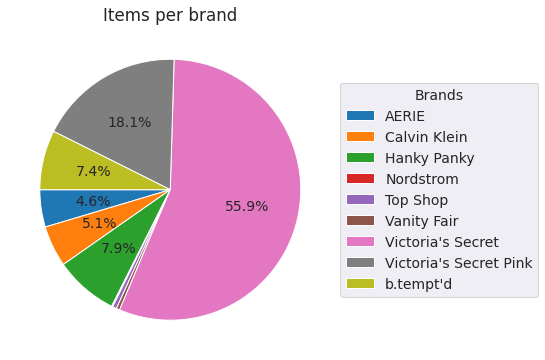

In [107]:
#This function hides labels below 4.0
def pct_brand_items(pct):
    return ('%1.1f%%' % pct) if pct > 4.0 else ''

plt.figure(figsize=(12,6))
plt.title("Items per brand")
wedges,text,autotext = plt.pie(brands_items_df, autopct=pct_brand_items, startangle=180);

plt.legend(wedges, brands_items_df.index,
          title="Brands",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

As we see, most items in our dataset belong to Victoria's Secret and Victoria's Secret Pink. 

### __Relationship Retailer/Items__


In [101]:
retailer_items_df = lingerie_df.groupby('retailer').product_name.count()

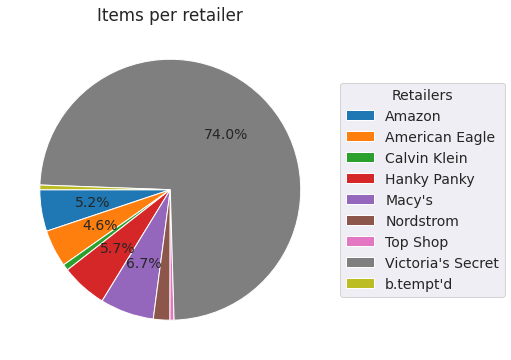

In [108]:
def pct_retailer_items(pct):
    return ('%1.1f%%' % pct) if pct > 4.0 else ''

plt.figure(figsize=(12,6))
plt.title("Items per retailer")
wedges,text,autotext = plt.pie(retailer_items_df, autopct=pct_retailer_items, startangle=180);

plt.legend(wedges, retailer_items_df.index,
          title="Retailers",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### __Mean of ratings per brand__


In [80]:
mean_ratings_df = lingerie_df.groupby('brand_name').rating.mean()
mean_ratings_df

brand_name
AERIE                     4.276217
Calvin Klein              4.335091
Hanky Panky               4.737747
Nordstrom                 3.542723
Top Shop                  4.245113
Vanity Fair               4.493637
Victoria's Secret         4.116166
Victoria's Secret Pink    4.327307
b.tempt'd                 4.322132
Name: rating, dtype: float64

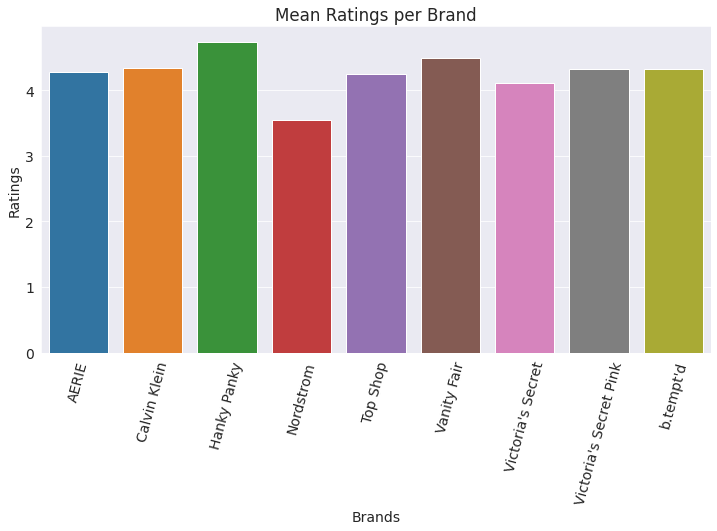

In [105]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Mean Ratings per Brand')
ax = sns.barplot(mean_ratings.index, mean_ratings);
ax.set(xlabel="Brands", ylabel = "Ratings");

### __Mean prices per Brand__

In [104]:
mean_prices_df = lingerie_df.groupby('brand_name').price.mean()
mean_prices_df

brand_name
AERIE                     16.219668
Calvin Klein              27.355830
Hanky Panky               43.090565
Nordstrom                 21.369390
Top Shop                  23.097692
Vanity Fair               27.230097
Victoria's Secret         34.117657
Victoria's Secret Pink    26.697677
b.tempt'd                 40.637795
Name: price, dtype: float64

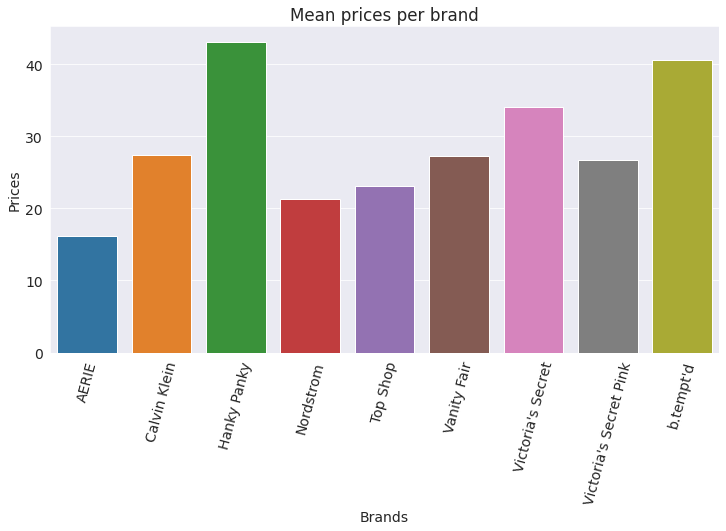

In [106]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Mean prices per brand')
ax = sns.barplot(mean_prices_df.index, mean_prices_df);
ax.set(xlabel="Brands", ylabel = "Prices");

### TODO: __Ratings of each brand__ scatterplot grid

In [109]:
lingerie_df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,American Eagle,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,American Eagle,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,American Eagle,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,American Eagle,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,American Eagle,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy


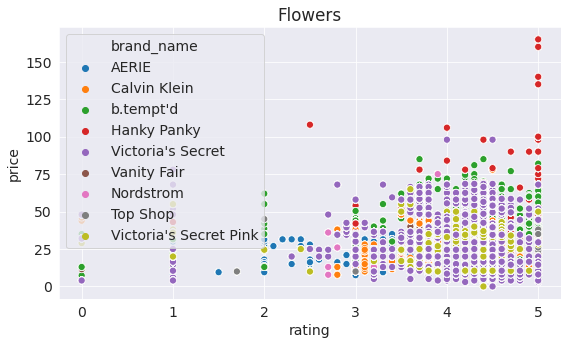

In [112]:
sns.scatterplot(lingerie_df.rating, # X-axis
                lingerie_df.price,  # Y-axis
                hue=lingerie_df.brand_name,  # Dot color
                s=50);

# Chart title
plt.title("Flowers");

TODO: Prices of each brand diagrama de caja

TODO: Box diagram of review count

## Asking and Answering Questions



## Inferences and Conclusion

TODO

## References and Future Work

__Dataset:__

[Innerwear Data from Victoria's Secret and Others](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others)

__Other References:__


[EDA for Lingerie](https://www.kaggle.com/justinekays/eda-for-lingerie)

[Data Driven Lingerie Shopping](https://www.kaggle.com/jkokatjuhha/data-driven-lingerie-shopping)